# 05 - Dummy Classifiers e Árvores de Decisão

In [35]:
# Anti-chatice
import warnings
warnings.filterwarnings("ignore")

In [36]:
# Importando o Pandas
import pandas as pd

# Definindo o dataset
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)

# Printando as 5 primeiras linhas dos dados
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


> Tratando os dados

In [37]:
renomear = {
    "mileage_per_year": "milhas_por_ano",
    "model_year": "ano_do_modelo",
    "price": "preco",
    "sold": "vendido"
}

dados = dados.rename(columns = renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [38]:
# Trocar para valores booleanos 0 ou 1
trocar = {
    "yes": 1,
    "no": 0
}

# Sobrescrevendo os valores da coluna vendido
dados["vendido"] = dados.vendido.map(trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [39]:
# Importando datetime
from datetime import datetime

# Criar uma coluna para a idade do carro
ano_atual = datetime.today().year
dados["idade_do_modelo"] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10


In [40]:
# Criando a coluna de quilômetros
dados["km_por_ano"] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,24,35085.22134
1,1,7843,1998,40557.96,1,26,12622.05362
2,2,7109,2006,89627.50,0,18,11440.79806
3,3,26823,2015,95276.14,0,9,43167.32682
4,4,7935,2014,117384.68,1,10,12770.11290


In [41]:
# Limpando os dados (eliminando colunas indesejadas)
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis = 1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


## Modelando com LinearSVC

In [42]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

In [43]:
# Importando bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

# Definindo a SEED para permanência do modelo
SEED = 20
np.random.seed(SEED) # Faz com que todo random_state == None (padrão), tenha essa SEED definida

# Definindo treinos e testes, dadas as matrizes x e y, SEED, tamanho do teste e estratificação
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        stratify = y)

# Conferindo tamanho
print(f"Treinando o modelo com {len(treino_x)} e testando com {len(teste_x)} elementos.")

# Definindo o modelo de predição linear, desta vez com uma SEED
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

# Definindo acurácia
acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%.")

Treinando o modelo com 7500 e testando com 2500 elementos.


A acurácia foi de 56.96%.


*Modelo ruim.*

## Testando acurácia do modelo com Dummy Classifier

In [44]:
# Importando Dummy
from sklearn.dummy import DummyClassifier

> Dummy Stratified

In [45]:
# Definindo o modelo de predição com Dummy Stratified
burro_stratified = DummyClassifier(strategy = "stratified")
burro_stratified.fit(treino_x, treino_y)
previsoes = burro_stratified.predict(teste_x)

# Definindo acurácia
acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia do burro stratified foi de {acuracia:.2f}%.")

A acurácia do burro stratified foi de 52.20%.


> Dummy Most Frequent

In [46]:
# Definindo o modelo de predição com Dummy Most Frequent
burro_mostfrequent = DummyClassifier(strategy = "most_frequent")
burro_mostfrequent.fit(treino_x, treino_y)

# Definindo acurácia direto
acuracia = burro_mostfrequent.score(teste_x, teste_y) * 100
print(f"A acurácia do burro most frequent foi de {acuracia:.2f}%.")

A acurácia do burro most frequent foi de 58.00%.


## Modelando com SVC

In [47]:
# Importando bibliotecas necessárias
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Definindo a SEED para permanência do modelo
SEED = 20
np.random.seed(SEED) # Faz com que todo random_state == None (padrão), tenha essa SEED definida

# Definindo treinos e testes, dadas as matrizes x e y, SEED, tamanho do teste e estratificação
cru_treino_x, cru_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        stratify = y)

# Conferindo tamanho
print(f"Treinando o modelo com {len(treino_x)} e testando com {len(teste_x)} elementos.")

# Reescalando os valores
escalador = StandardScaler()
escalador.fit(cru_treino_x)
treino_x = escalador.transform(cru_treino_x)
teste_x = escalador.transform(cru_teste_x)

# Definindo o modelo de predição linear, desta vez com uma SEED
modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

# Definindo acurácia
acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%.")

Treinando o modelo com 7500 e testando com 2500 elementos.


A acurácia foi de 75.92%.


*Melhorou bastante.*

## Modelando com Decision Tree Classifier

In [48]:
# Importando bibliotecas necessárias
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Definindo a SEED para permanência do modelo
SEED = 20
np.random.seed(SEED) # Faz com que todo random_state == None (padrão), tenha essa SEED definida

# Definindo treinos e testes, dadas as matrizes x e y, SEED, tamanho do teste e estratificação
cru_treino_x, cru_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        stratify = y)

# Conferindo tamanho
print(f"Treinando o modelo com {len(treino_x)} e testando com {len(teste_x)} elementos.")

# Sem reescalar valores para a Árvore de Decisão
# escalador = StandardScaler()
# escalador.fit(cru_treino_x)
# treino_x = escalador.transform(cru_treino_x)
# teste_x = escalador.transform(cru_teste_x)

# Definindo o modelo de predição, desta vez com uma SEED
modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(cru_treino_x, treino_y)
previsoes = modelo.predict(cru_teste_x)

# Definindo acurácia
acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%.")

Treinando o modelo com 7500 e testando com 2500 elementos.
A acurácia foi de 78.40%.


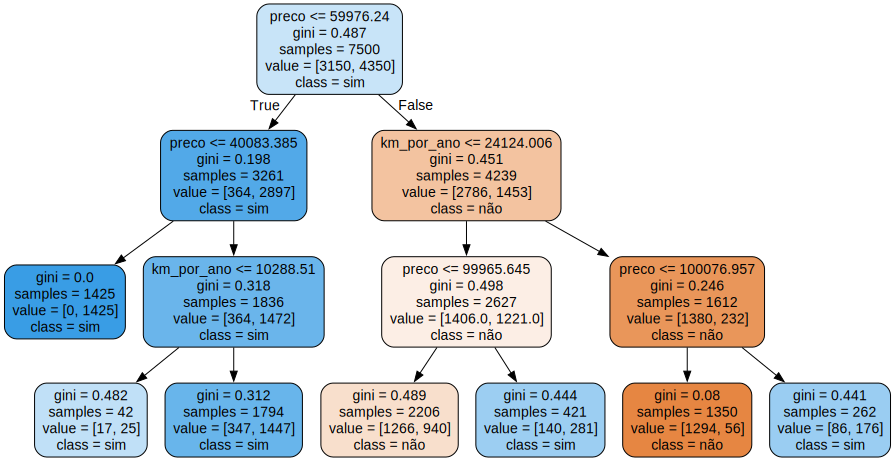

In [49]:
# Importando Graphviz
from sklearn.tree import export_graphviz
import graphviz

# Mudando o nome das features no gráfico para ficar entendível
features = x.columns
dados_de_pontos = export_graphviz(modelo,
                                  out_file = None,
                                  filled = True,
                                  rounded = True,
                                  feature_names = features,
                                  class_names = ["não", "sim"]
                                  )
grafico = graphviz.Source(dados_de_pontos)
grafico